__Ray Tracing__

In this example, we'll use the 'ray-tracing' module, to setup the same lens-plane + source-plane strong lens configuration as the previous tutorial, but with a lot less lines of code!

In [ ]:
%matplotlib inline

from autolens.model.profiles import light_profiles
from autolens.model.profiles import mass_profiles
from autolens.model.galaxy import galaxy
from autolens.lens import ray_tracing
from autolens.data.array import grids
from autolens.lens.plotters import plane_plotters
from autolens.lens.plotters import ray_tracing_plotters

Let use the same grid-stack we've all grown to know and love by now!

In [ ]:
image_plane_grid_stack = grids.GridStack.from_shape_pixel_scale_and_sub_grid_size(
    shape=(100, 100), pixel_scale=0.05, sub_grid_size=2
)

For our lens galaxy, we'll use the same SIS mass profile as before.

In [ ]:
sis_mass_profile = mass_profiles.SphericalIsothermal(
    centre=(0.0, 0.0), einstein_radius=1.6
)

lens_galaxy = galaxy.Galaxy(redshift=0.5, mass=sis_mass_profile)

print(lens_galaxy)

Redshift: 0.5
Mass Profiles:
SphericalIsothermal
centre: (0.0, 0.0)
axis_ratio: 1.0
phi: 0.0
einstein_radius: 1.6
slope: 2.0
core_radius: 0.0


And for our source galaxy, the same Sersic light profile

In [ ]:
sersic_light_profile = light_profiles.SphericalSersic(
    centre=(0.0, 0.0), intensity=1.0, effective_radius=1.0, sersic_index=1.0
)

source_galaxy = galaxy.Galaxy(redshift=1.0, light=sersic_light_profile)

print(source_galaxy)

Redshift: 1.0
Light Profiles:
SphericalSersic
centre: (0.0, 0.0)
axis_ratio: 1.0
phi: 0.0
intensity: 1.0
effective_radius: 1.0
sersic_index: 1.0


Now, lets use the lens and source galaxies to ray-trace our grid-stack, using a 'tracer' from the ray-tracing module. When we pass our galaxies and grid-stack into the Tracer below, the following happens:

1) Using the lens-galaxy's mass-profile, the deflection angle of every image-plane grid coordinate is computed.

2) These deflection angles are used to trace every image-plane coordinate to a source-plane coordinate.

3) This creates the source-plane grid-stack of lensed coordinates.

In [ ]:
tracer = ray_tracing.Tracer.from_galaxies_and_image_plane_grid_stack(
    galaxies=[lens_galaxy, source_galaxy],
    image_plane_grid_stack=image_plane_grid_stack,
)

The tracer is composed of an image-plane and source-plane, just like in the previous example!

In [ ]:
print("Regular-grid image-plane coordinate 1")
print(tracer.image_plane.grid_stack.regular[0])
print("Regular-grid image-plane coordinate 2")
print(tracer.image_plane.grid_stack.regular[1])
print("Regular-grid image-plane coordinate 3")
print(tracer.image_plane.grid_stack.regular[2])

Regular-grid image-plane coordinate 1
[ 2.475 -2.475]
Regular-grid image-plane coordinate 2
[ 2.475 -2.425]
Regular-grid image-plane coordinate 3
[ 2.475 -2.375]


And the source-plane's grid has been deflected.

In [ ]:
print("Regular-grid source-plane coordinate 1")
print(tracer.source_plane.grid_stack.regular[0])
print("Regular-grid source-plane coordinate 2")
print(tracer.source_plane.grid_stack.regular[1])
print("Regular-grid source-plane coordinate 3")
print(tracer.source_plane.grid_stack.regular[2])

Regular-grid source-plane coordinate 1
[ 1.34362915 -1.34362915]
Regular-grid source-plane coordinate 2
[ 1.33214405 -1.30523205]
Regular-grid source-plane coordinate 3
[ 1.32054728 -1.26719184]


We can use the plane_plotter to plot these grids, like we did before.

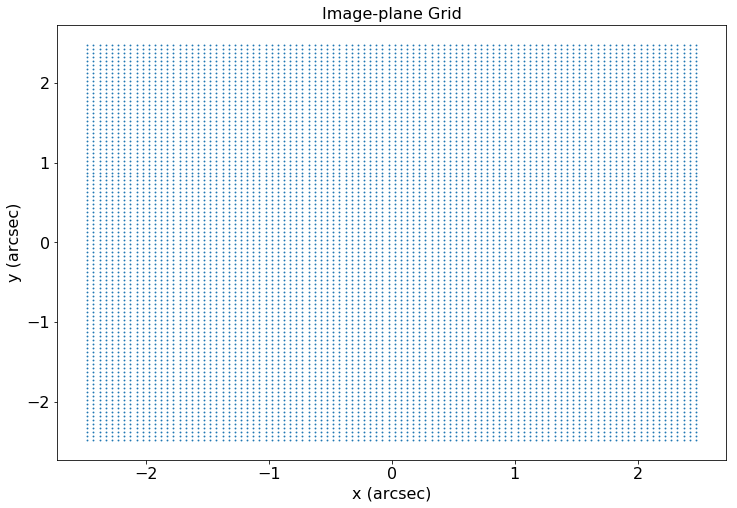

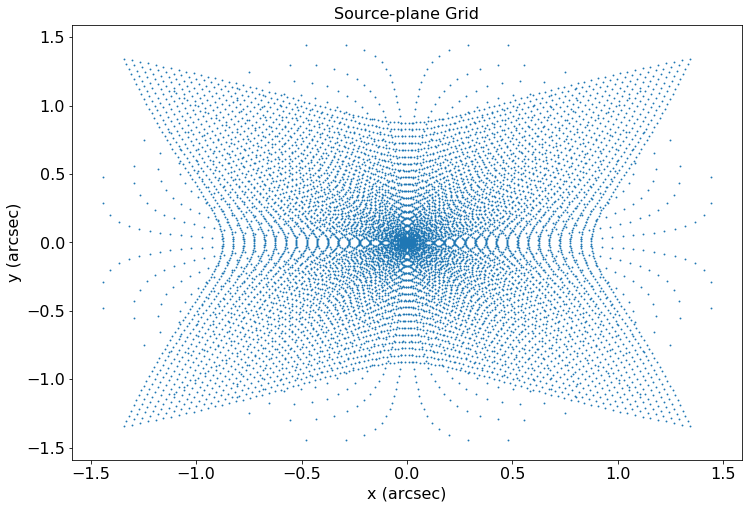

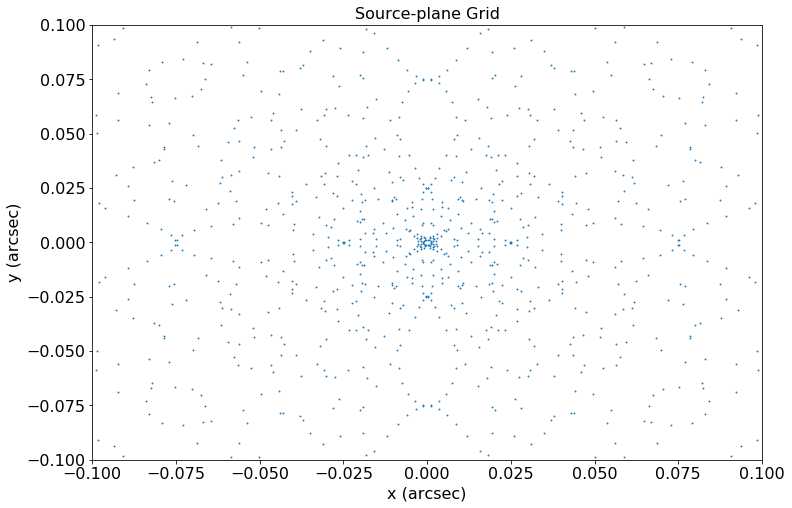

In [ ]:
plane_plotters.plot_plane_grid(plane=tracer.image_plane, title="Image-plane Grid")

plane_plotters.plot_plane_grid(plane=tracer.source_plane, title="Source-plane Grid")

plane_plotters.plot_plane_grid(
    plane=tracer.source_plane,
    axis_limits=[-0.1, 0.1, -0.1, 0.1],
    title="Source-plane Grid",
)

PyAutoLens has tools for plotting a tracer. A ray-tracing subplot plots the following:

1) The image-plane image, computed by tracing the source galaxy's light 'forwards' through the tracer.

2) The source-plane image, showing the source galaxy's true appearance (i.e. if it were not lensed).

3) The image-plane convergence, computed using the lens galaxy's mass profile.

4) The image-plane gravitational potential, computed using the lens galaxy's mass profile.

5) The image-plane deflection angles, computed using the lens galaxy's mass profile.

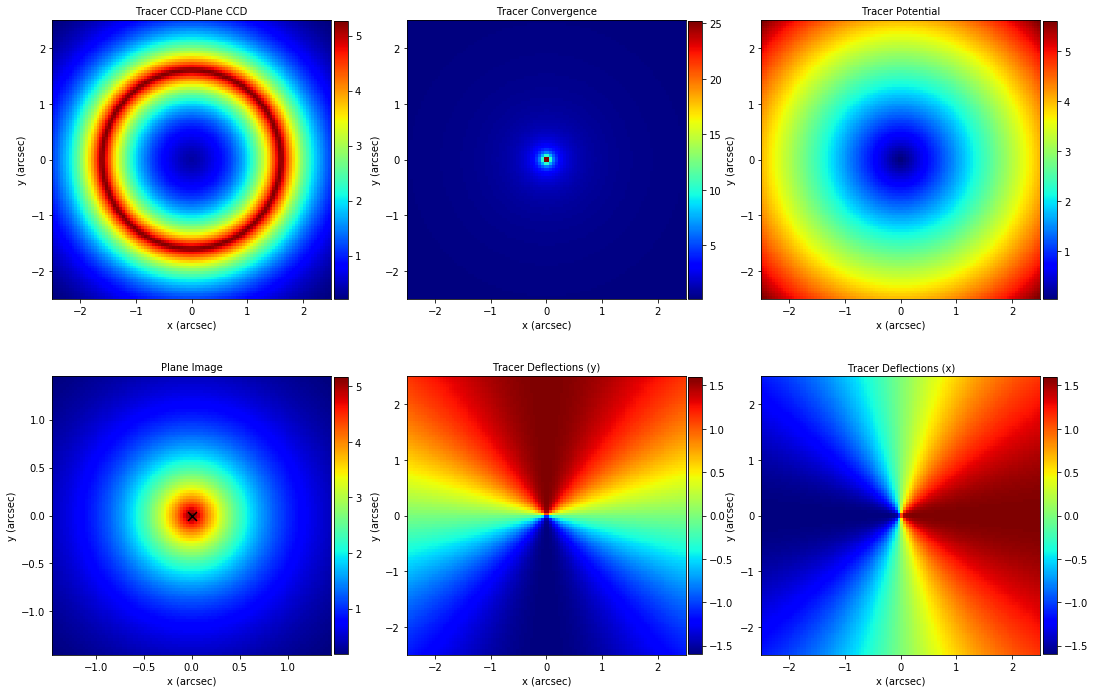

In [ ]:
ray_tracing_plotters.plot_ray_tracing_subplot(tracer=tracer)

Just like for a plane, these attributes can be accessed by print statements (converted to 2D NumPy arrays the same dimensions as our input grid-stack!).

In [ ]:
tracer_convergence = tracer.convergence(return_in_2d=True, return_binned=True)

print("Tracer - Convergence - Regular-grid coordinate 0:")
print(tracer_convergence[0, 0])
print("Tracer - Convergence - Regular-grid coordinate 1:")
print(tracer_convergence[0, 1])
print("Tracer - Convergence - Regular-grid coordinate 2:")
print(tracer_convergence[0, 2])
print("Tracer - Convergence - Regular-grid coordinate 100:")
print(tracer_convergence[1, 0])

Tracer - Convergence - Regular-grid coordinate 0:
0.22741122611024647
Tracer - Convergence - Regular-grid coordinate 1:
0.22855685270631343
Tracer - Convergence - Regular-grid coordinate 2:
0.22970813194808845
Tracer - Convergence - Regular-grid coordinate 100:
0.22855685270631343


Of course, these convergences are identical to the image-plane convergences, as it's only the lens galaxy that contributes to the overall mass of the ray-tracing system.

In [ ]:
image_plane_convergence = tracer.image_plane.convergence(return_in_2d=True, return_binned=True)

print("Image-Plane - Convergence - Regular-grid coordinate 0:")
print(image_plane_convergence[0, 0])
print("Image-Plane - Convergence - Regular-grid coordinate 1:")
print(image_plane_convergence[0, 1])
print("Image-Plane - Convergence - Regular-grid coordinate 2:")
print(image_plane_convergence[0, 2])
print("Image-Plane - Convergence - Regular-grid coordinate 100:")
print(image_plane_convergence[1, 0])

Image-Plane - Convergence - Regular-grid coordinate 0:
0.22741122611024647
Image-Plane - Convergence - Regular-grid coordinate 1:
0.22855685270631343
Image-Plane - Convergence - Regular-grid coordinate 2:
0.22970813194808845
Image-Plane - Convergence - Regular-grid coordinate 100:
0.22855685270631343


I've left the rest below commented to avoid too many print statements, but if you're feeling adventurous go ahead and uncomment the lines below!

In [12]:
# print('Potential:')
# print(tracer.potential(return_in_2d=True))
# print(tracer.image_plane.potential(return_in_2d=True))
# print('Deflections:')
# print(tracer.deflections_x(return_in_2d=True))
# print(tracer.deflections_y(return_in_2d=True))
# print(tracer.image_plane.deflections_x(return_in_2d=True))
# print(tracer.image_plane.deflections_y)return_in_2d=True))
# print('Image-plane Image:'(return_in_2d=True))
# print(tracer.image_plane_image(return_in_2d=True))
# print(tracer.image_plane.image_plane_image(return_in_2d=True))
# print('Source-plane Image:'(return_in_2d=True))
# print(tracer.source_plane_image(return_in_2d=True))
# print(tracer.image_plane.source_plane_image(return_in_2d=True))

You can also plot the above attributes on individual figures, using appropriate ray-tracing plotter (I've left most commented out again for convinience)

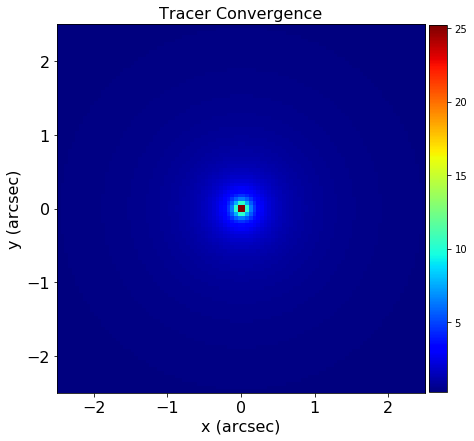

In [ ]:
ray_tracing_plotters.plot_convergence(tracer=tracer)

# ray_tracing_plotters.plot_potential(tracer=tracer)
# ray_tracing_plotters.plot_deflections_y(tracer=tracer)
# ray_tracing_plotters.plot_deflections_x(tracer=tracer)
# ray_tracing_plotters.plot_image_plane_image(tracer=tracer)

Before we finish, you might be wondering 'why do both the image-plane and tracer have the attributes surface density / potential / deflection angles, when the two are identical'. Afterall, only mass profiles contribute to these quantities, and only the image-plane has galaxies with measureable  mass profiles! There are two reasons:

1) Convinience - You could always write 'tracer.image_plane.convergence' and 'plane_plotters.convergence(plane=tracer.image_plane). However, code appears neater if you can just write 'tracer.convergence' and 'ray_tracing_plotters.plot_convergence(tracer=tracer).

2) Multi-plane lensing - For now, we're focused on the simplest lensing configuratio possible, an image-plane + source-plane configuration. However, there are strong lens system where there are more than 2 planes! In these instances, the  surface density, potential and deflections of each plane is different to the overall values given by the tracer.  This is beyond the scope of this chapter, but be reassured that what you're learning now will prepare you for the advanced chapters later on!

And with that, we're done. You've performed your first ray-tracing with PyAutoLens! There are no exercises for this chapter, and we're going to take a deeper look at ray-tracing in the next chapter.